PCA(Principle Component Analysis)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


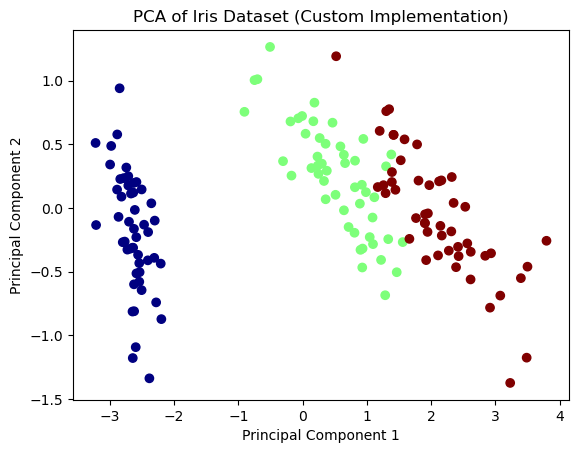

In [3]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs =  np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[idxs]
        eigenvalues = eigenvalues[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]

plt.scatter(pc1, pc2, c=y, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset (Custom Implementation)")
plt.show()

LDA(Linear Discriminant Analysis)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Shape of Data: (150, 4)
Shape of transformed Data: (150, 2)


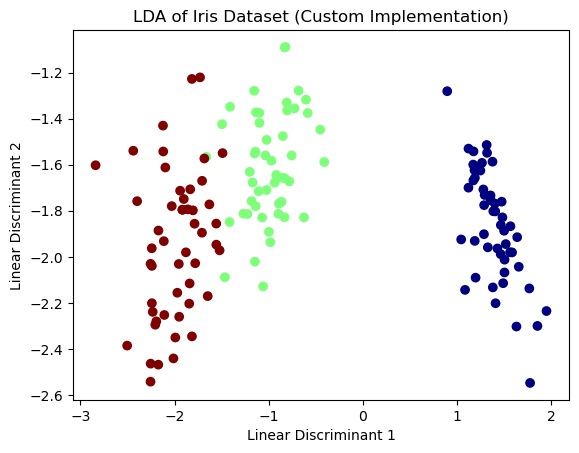

In [5]:
class LDA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.linear_discreminants = None

    def fit(self, X, y):
        n_feautures = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_feautures, n_feautures))
        SB = np.zeros((n_feautures, n_feautures))
        for c in class_labels:
            X_c = X[ y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_feautures, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)
            A = np.linalg.inv(SW).dot(SB)
            eigenvalues, eigenvectors = np.linalg.eig(A)
            eigenvectors = eigenvectors.T
            idxs =  np.argsort(eigenvalues)[::-1]
            eigenvectors = eigenvectors[idxs]
            eigenvalues = eigenvalues[idxs]

            self.linear_discreminants = eigenvectors[:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discreminants.T)

# Load the Iris dataset
X = load_iris().data
y = load_iris().target

# Perform LDA
lda = LDA(n_components=2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of Data:", X.shape)
print("Shape of transformed Data:", X_projected.shape)

# Plot the results
ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]

plt.scatter(ld1, ld2, c=y, cmap="jet")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("LDA of Iris Dataset (Custom Implementation)")
plt.show()